In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Step 0 : Using the historical average price and playing Rick's csv

In [4]:
hist = pd.read_csv('diamonds_clean.csv')
hist.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,carat_log,price_log
0,0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,1.0,5.0,4.0,-1.560648,5.786897
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,3.0,5.0,2.0,-1.469676,5.789960
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,4.0,1.0,4.0,-1.237874,5.811141
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,2.0,0.0,2.0,-1.171183,5.814131
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.480600,6.0,0.0,3.0,-1.427116,5.817111


In [5]:
rick = pd.read_csv('rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [14]:
rick.loc[rick['clarity'] == 'I1', 'clarity_num'] = 0
rick.loc[rick['clarity'] == 'SI1', 'clarity_num'] = 1
rick.loc[rick['clarity'] == 'SI2', 'clarity_num'] = 2
rick.loc[rick['clarity'] == 'VS1', 'clarity_num'] = 3
rick.loc[rick['clarity'] == 'VS2', 'clarity_num'] = 4
rick.loc[rick['clarity'] == 'VVS1', 'clarity_num'] = 5
rick.loc[rick['clarity'] == 'VVS2', 'clarity_num'] = 6
rick.loc[rick['clarity'] == 'IF', 'clarity_num'] = 7
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [15]:
rick.loc[rick['color'] == 'J', 'color_num'] = 0
rick.loc[rick['color'] == 'I', 'color_num'] = 1
rick.loc[rick['color'] == 'H', 'color_num'] = 2
rick.loc[rick['color'] == 'G', 'color_num'] = 3
rick.loc[rick['color'] == 'F', 'color_num'] = 4
rick.loc[rick['color'] == 'E', 'color_num'] = 5
rick.loc[rick['color'] == 'D', 'color_num'] = 6
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [16]:
rick.loc[rick['cut'] == 'Fair', 'cut_num'] = 1
rick.loc[rick['cut'] == 'Good', 'cut_num'] = 2
rick.loc[rick['cut'] == 'Very Good', 'cut_num'] = 3
rick.loc[rick['cut'] == 'Premium', 'cut_num'] = 4
rick.loc[rick['cut'] == 'Ideal', 'cut_num'] = 5
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [17]:
rick["carat_log"] = np.log(rick["carat"])
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [18]:
diamonds_v1 = rick
diamonds_v1.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592


In [19]:
diamonds_v1['price_predicted'] = hist['price'].mean()
diamonds_v1.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [20]:
diamonds_v1.to_csv('diamonds_v1.csv')

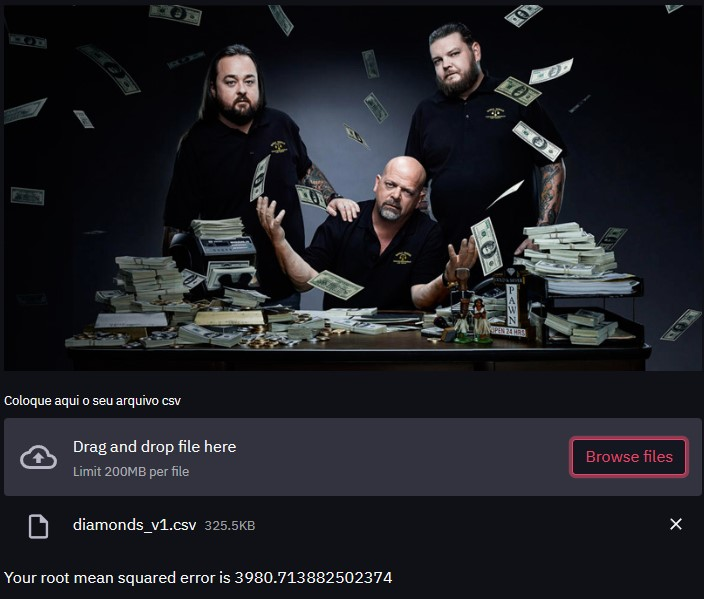

## Step 1: Creating an initial model correlating only carat and price

In [21]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,carat_log,price_log
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,1.0,5.0,4.0,-1.560648,5.786897
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,3.0,5.0,2.0,-1.469676,5.789960
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,4.0,1.0,4.0,-1.237874,5.811141
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,2.0,0.0,2.0,-1.171183,5.814131
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.480600,6.0,0.0,3.0,-1.427116,5.817111


In [22]:
X = diamonds[["carat"]]  
y = diamonds["price"]  

In [23]:
model = LinearRegression()

In [24]:
model.fit(X, y)

LinearRegression()

In [25]:
model.coef_[0]

7758.489913475912

In [26]:
model.intercept_

-2255.6809337303393

In [27]:
predict_price = model.predict(X)
predict_price

array([-626.3980519 , -471.22825363,   -5.71885882, ..., 3330.43180397,
       3175.2620057 , 3563.18650138])

D:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


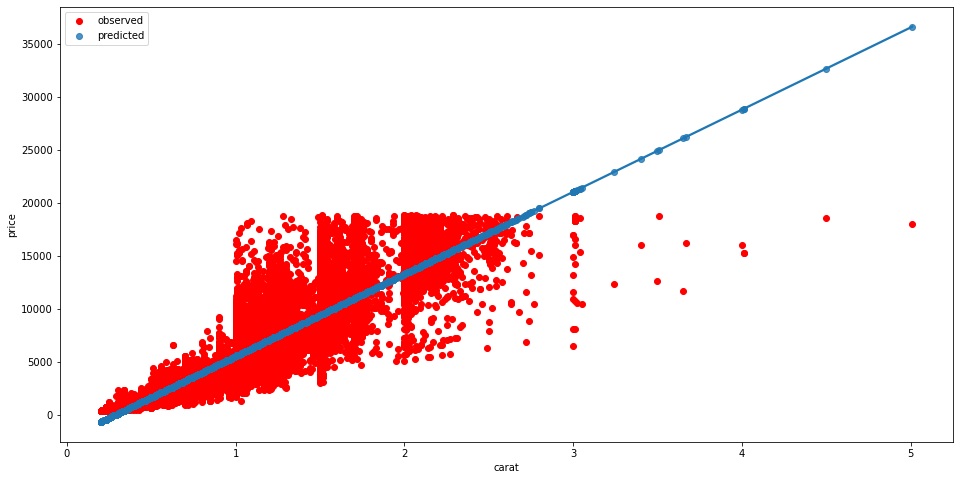

In [28]:
plt.figure(figsize=(16, 8))
plt.xlabel("carat")
plt.ylabel("price")
plt.scatter(X, y, color="red", label="observed")

# plot the predicted values together with the observed values
sns.regplot(X, predict_price, label="predicted")
plt.legend();

In [29]:
np.sqrt(mean_squared_error(y, model.predict(X)))

1542.3350958606716

### Applying the model to Rick's dataset

In [30]:
diamonds_v2 = rick.copy()
x = diamonds_v2[["carat"]]
diamonds_v2['price_predicted'] = model.predict(x)
diamonds_v2.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,4804.544888
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,692.545233
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,1778.733821
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,6278.657971
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,15433.676069


In [31]:
diamonds_v2.to_csv('diamonds_v2.csv')

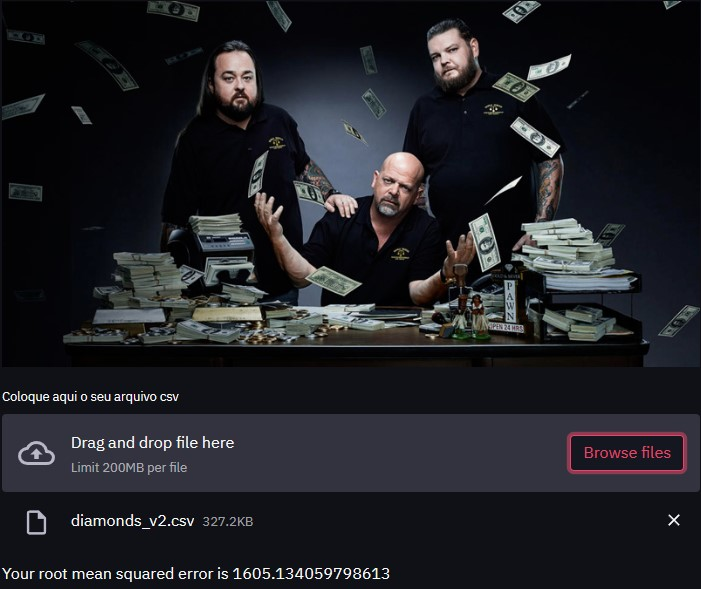

## Step 2: Let's try to improve our predicted price by inserting new variables

In [23]:
# Since the suspicion is that the association with clarity makes the correlation closer, we will focus on the analysis of 
# this variable

In [32]:
X1 = diamonds[["carat_log", "clarity_num"]]
y1 = diamonds["price_log"]

In [33]:
model1 = LinearRegression()

In [34]:
model1.fit(X1, y1)

LinearRegression()

In [35]:
model1.coef_

array([1.76134597, 0.089409  ])

In [36]:
model1.intercept_

8.207440439748726

In [37]:
predict_price1 = model1.predict(X1)
predict_price1

array([5.54800881, 5.88705959, 6.38475144, ..., 7.71824013, 7.66862147,
       7.87955078])

In [38]:
np.sqrt(mean_squared_error(y1, model1.predict(X1)))

0.2148938861162951

### Applying the model to Rick's dataset

In [41]:
diamonds_v3 = rick.copy()
diamonds_v3.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [42]:
x1 = diamonds_v3[["carat_log", "clarity_num"]]
x1

,carat_log,clarity_num
0,-0.094311,2.0
1,-0.967584,4.0
2,-0.653926,4.0
3,0.095310,3.0
4,0.824175,2.0
...,...,...
4995,-1.203973,2.0
4996,-0.673345,6.0
4997,0.009950,1.0
4998,-1.171183,5.0


In [43]:
diamonds_v3["price_predicted"] = np.exp(model1.predict(x1))
diamonds_v3.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3715.039945
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,954.155085
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,1657.864652
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,5673.387433
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,18730.650848


In [44]:
diamonds_v3.to_csv('diamonds_v3.csv')

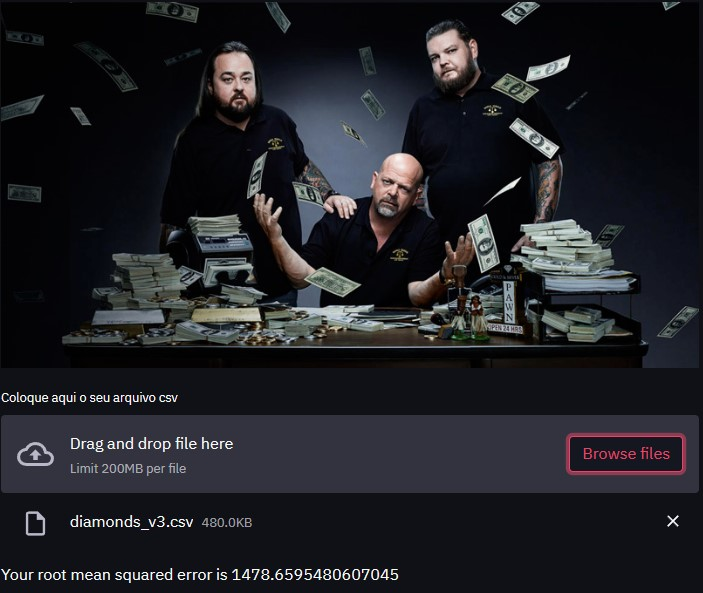

## Step 3: Inserting cut and color

In [45]:
X2 = diamonds[["carat_log", "clarity_num", "cut_num", "color_num"]]
y2 = diamonds["price_log"]

In [46]:
model2 = LinearRegression()
model2.fit(X2, y2)
predict_price2 = model2.predict(X2)
np.sqrt(mean_squared_error(y2, model2.predict(X2)))

0.17734090012617118

### Applying the model to Rick's dataset

In [50]:
diamonds_v4 = rick.copy()
diamonds_v4.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3933.641592
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,3933.641592
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,3933.641592
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,3933.641592
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,3933.641592


In [51]:
x2 = diamonds_v4[["carat_log", "clarity_num", "cut_num", "color_num"]]
diamonds_v4["price_predicted"] = np.exp(model2.predict(x2))
diamonds_v4.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,3311.012866
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,895.334626
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,1540.407814
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,5927.330620
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,20482.797748


In [52]:
diamonds_v4.to_csv('diamonds_v4.csv')

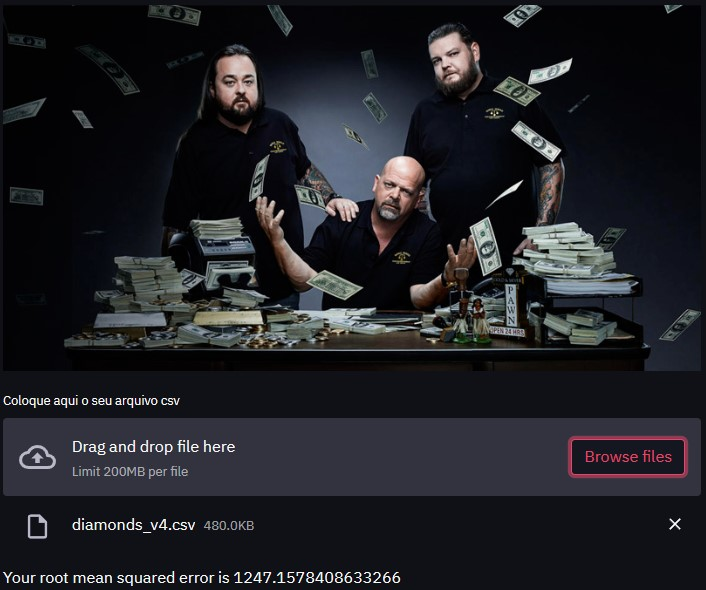

## Step 4: What if a model was created for each type of brightness (since the plot was heterogeneous), as if each brightness level had its "own function"

In [53]:
diamonds_1 = diamonds[diamonds["clarity_num"] == 0]
diamonds_2 = diamonds[diamonds["clarity_num"] == 1]
diamonds_3 = diamonds[diamonds["clarity_num"] == 2]
diamonds_4 = diamonds[diamonds["clarity_num"] == 3]
diamonds_5 = diamonds[diamonds["clarity_num"] == 4]
diamonds_6 = diamonds[diamonds["clarity_num"] == 5]
diamonds_7 = diamonds[diamonds["clarity_num"] == 6]
diamonds_8 = diamonds[diamonds["clarity_num"] == 7]


In [54]:
# let's associate carat_log, cut and color to each brightness level, to predict the log of the price

X1 = diamonds_1[["carat_log", "cut_num", "color_num"]]
y1 = diamonds_1["price_log"]

X2 = diamonds_2[["carat_log", "cut_num", "color_num"]]
y2 = diamonds_2["price_log"]

X3 = diamonds_3[["carat_log", "cut_num", "color_num"]]
y3 = diamonds_3["price_log"]

X4 = diamonds_4[["carat_log", "cut_num", "color_num"]]
y4 = diamonds_4["price_log"]

X5 = diamonds_5[["carat_log", "cut_num", "color_num"]]
y5 = diamonds_5["price_log"]

X6 = diamonds_6[["carat_log", "cut_num", "color_num"]]
y6 = diamonds_6["price_log"]

X7 = diamonds_7[["carat_log", "cut_num", "color_num"]]
y7 = diamonds_7["price_log"]

X8 = diamonds_8[["carat_log", "cut_num", "color_num"]]
y8 = diamonds_8["price_log"]

In [56]:
#now we will create a linear regression model for each level of brightness

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()
model7 = LinearRegression()
model8 = LinearRegression()

model1.fit(X1, y1)
model2.fit(X2, y2)
model3.fit(X3, y3)
model4.fit(X4, y4)
model5.fit(X5, y5)
model6.fit(X6, y6)
model7.fit(X7, y7)
model8.fit(X8, y8)

LinearRegression()

In [57]:
diamonds_1["price_predicted"] = np.exp(model1.predict(X1))
diamonds_2["price_predicted"] = np.exp(model2.predict(X2))
diamonds_3["price_predicted"] = np.exp(model3.predict(X3))
diamonds_4["price_predicted"] = np.exp(model4.predict(X4))
diamonds_5["price_predicted"] = np.exp(model5.predict(X5))
diamonds_6["price_predicted"] = np.exp(model6.predict(X6))
diamonds_7["price_predicted"] = np.exp(model7.predict(X7))
diamonds_8["price_predicted"] = np.exp(model8.predict(X8))

C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\2144146000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_1["price_predicted"] = np.exp(model1.predict(X1))
C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\2144146000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_2["price_predicted"] = np.exp(model2.predict(X2))
C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\2144146000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [58]:
print('1: ' + f'{np.sqrt(mean_squared_error(diamonds_1["price"], diamonds_1["price_predicted"]))}')
print('2: ' + f'{np.sqrt(mean_squared_error(diamonds_2["price"], diamonds_2["price_predicted"]))}')
print('3: ' + f'{np.sqrt(mean_squared_error(diamonds_3["price"], diamonds_3["price_predicted"]))}')
print('4: ' + f'{np.sqrt(mean_squared_error(diamonds_4["price"], diamonds_4["price_predicted"]))}')
print('5: ' + f'{np.sqrt(mean_squared_error(diamonds_5["price"], diamonds_5["price_predicted"]))}')
print('6: ' + f'{np.sqrt(mean_squared_error(diamonds_6["price"], diamonds_6["price_predicted"]))}')
print('7: ' + f'{np.sqrt(mean_squared_error(diamonds_7["price"], diamonds_7["price_predicted"]))}')
print('8: ' + f'{np.sqrt(mean_squared_error(diamonds_8["price"], diamonds_8["price_predicted"]))}')

1: 1016.041659345892
2: 665.7403526442488
3: 1021.1592317380956
4: 717.9317884453369
5: 735.8346933062461
6: 605.7191410015704
7: 666.9271558767223
8: 724.5553479610566


In [59]:
diamonds_all = pd.concat([diamonds_1, diamonds_2, diamonds_3, diamonds_4, diamonds_5, diamonds_6, diamonds_7, diamonds_8])
diamonds_all

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,carat_log,price_log,price_predicted
13,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.67960,0.0,5.0,4.0,-1.139434,5.843544,470.564444
162,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13273,0.0,0.0,3.0,0.157004,7.928046,2751.889401
203,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.93975,0.0,4.0,4.0,0.009950,7.930566,2794.692100
227,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03125,0.0,5.0,1.0,0.009950,7.933080,2344.223257
294,0.96,Ideal,F,I1,60.7,55.0,2801,6.37,6.41,3.87873,0.0,4.0,5.0,-0.040822,7.937732,2774.080565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,0.54,Ideal,F,IF,62.2,54.0,2729,5.24,5.27,3.26861,7.0,4.0,5.0,-0.616186,7.911691,2762.988047
48798,0.51,Ideal,F,IF,62.5,54.0,2730,5.12,5.16,3.21250,7.0,4.0,5.0,-0.673345,7.912057,2481.976993
48813,0.52,Ideal,F,IF,61.7,57.0,2733,5.13,5.17,3.17755,7.0,4.0,5.0,-0.653926,7.913155,2574.082857
48885,0.52,Ideal,F,IF,61.5,57.0,2749,5.15,5.19,3.17955,7.0,4.0,5.0,-0.653926,7.918992,2574.082857


In [60]:
np.sqrt(mean_squared_error(diamonds_all["price"], diamonds_all["price_predicted"]))

764.1129551286591

### Applying the model to Rick's dataset

In [62]:
diamonds_v5 = rick.copy()
diamonds_v5.drop(columns=["price_predicted"],
    inplace=True,)
diamonds_v5

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2.0,6.0,3.0,-1.203973
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6.0,4.0,5.0,-0.673345
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,1.0,4.0,3.0,0.009950
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5.0,4.0,5.0,-1.171183


In [63]:
diamonds_v5_1 = diamonds_v5[diamonds_v5["clarity_num"] == 0]
diamonds_v5_2 = diamonds_v5[diamonds_v5["clarity_num"] == 1]
diamonds_v5_3 = diamonds_v5[diamonds_v5["clarity_num"] == 2]
diamonds_v5_4 = diamonds_v5[diamonds_v5["clarity_num"] == 3]
diamonds_v5_5 = diamonds_v5[diamonds_v5["clarity_num"] == 4]
diamonds_v5_6 = diamonds_v5[diamonds_v5["clarity_num"] == 5]
diamonds_v5_7 = diamonds_v5[diamonds_v5["clarity_num"] == 6]
diamonds_v5_8 = diamonds_v5[diamonds_v5["clarity_num"] == 7]

In [64]:
x1 = diamonds_v5_1[["carat_log", "cut_num", "color_num"]]
x2 = diamonds_v5_2[["carat_log", "cut_num", "color_num"]]
x3 = diamonds_v5_3[["carat_log", "cut_num", "color_num"]]
x4 = diamonds_v5_4[["carat_log", "cut_num", "color_num"]]
x5 = diamonds_v5_5[["carat_log", "cut_num", "color_num"]]
x6 = diamonds_v5_6[["carat_log", "cut_num", "color_num"]]
x7 = diamonds_v5_7[["carat_log", "cut_num", "color_num"]]
x8 = diamonds_v5_8[["carat_log", "cut_num", "color_num"]]

In [65]:
diamonds_v5_1["price_predicted"] = np.exp(model1.predict(x1))
diamonds_v5_2["price_predicted"] = np.exp(model2.predict(x2))
diamonds_v5_3["price_predicted"] = np.exp(model3.predict(x3))
diamonds_v5_4["price_predicted"] = np.exp(model4.predict(x4))
diamonds_v5_5["price_predicted"] = np.exp(model5.predict(x5))
diamonds_v5_6["price_predicted"] = np.exp(model6.predict(x6))
diamonds_v5_7["price_predicted"] = np.exp(model7.predict(x7))
diamonds_v5_8["price_predicted"] = np.exp(model8.predict(x8))

C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\3618109948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_v5_1["price_predicted"] = np.exp(model1.predict(x1))
C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\3618109948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_v5_2["price_predicted"] = np.exp(model2.predict(x2))
C:\Users\thoma\AppData\Local\Temp\ipykernel_28360\3618109948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [66]:
diamonds_v5 = pd.concat([diamonds_v5_1, diamonds_v5_2, diamonds_v5_3, diamonds_v5_4, diamonds_v5_5, diamonds_v5_6, diamonds_v5_7, diamonds_v5_8])
diamonds_v5.sort_index(inplace=True)
diamonds_v5

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,carat_log,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,2.0,3.0,-0.094311,2937.946328
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,4.0,2.0,-0.967584,845.250426
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,2.0,5.0,-0.653926,1395.763232
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3.0,3.0,5.0,0.095310,6827.231531
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,3.0,5.0,0.824175,17775.406190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2.0,6.0,3.0,-1.203973,460.247479
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6.0,4.0,5.0,-0.673345,1981.840111
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,1.0,4.0,3.0,0.009950,4672.224233
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5.0,4.0,5.0,-1.171183,849.368971


In [67]:
diamonds_v5.to_csv('diamonds_v5.csv')

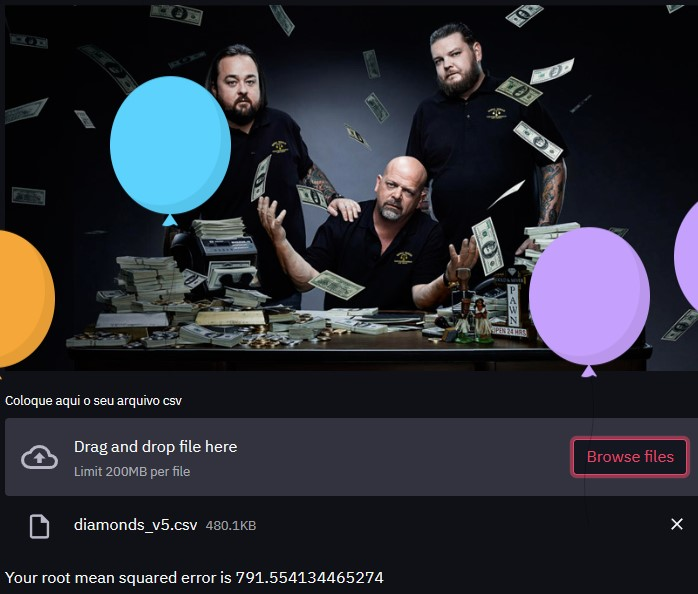